<a href="https://colab.research.google.com/github/crazyelf1971/imf-gdp/blob/main/GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Этот код расположен в репозитории https://github.com/crazyelf1971/imf-gdp  
Он забирает данные с сайта МВФ и отрисовывает графики ВВП по нескольким выбранным странам.

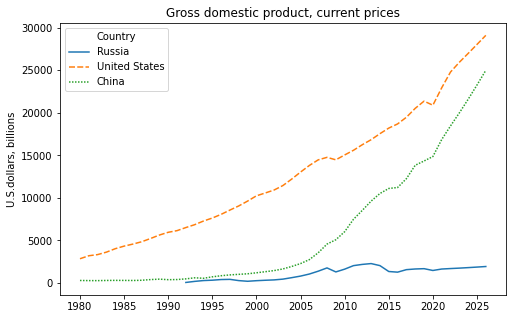

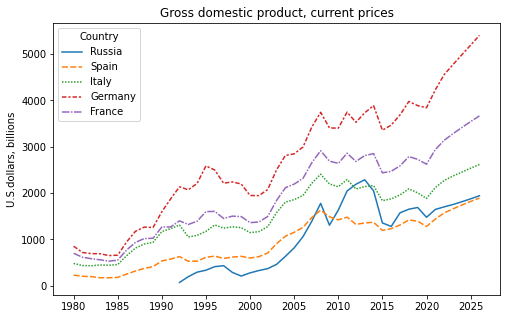

In [111]:
from io import StringIO
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

url = 'https://www.imf.org/-/media/Files/Publications/WEO/WEO-Database/2021/WEOOct2021all.ashx'
data = requests.get(url).content.decode('cp1251')
data = '\n'.join(data.split('\n')[:-4])
df = pd.read_csv(StringIO(data), sep='\t')
columns = ['Country'] + [col for col in df.columns if col.isdigit()]
dfd = df.loc[(df['WEO Subject Code'] == 'NGDPD'), columns]
df1 = dfd.set_index('Country').stack()
df1 = df1.fillna('').str.replace(',','').astype(float)
df2 = df1.unstack('Country')
df2.index = df2.index.astype(int)
for countries in [['Russia','United States','China'],['Russia','Spain','Italy','Germany','France']]:
    plt.figure(figsize=(8,5));
    sns.lineplot(data=df2[countries]);
    plt.title('Gross domestic product, current prices');
    plt.ylabel('U.S.dollars, billions');
    ticks = list(range(df2.index.min(), df2.index.max()+1, 5));
    plt.xticks(ticks); #, rotation=45); #, fontsize=8);
    #plt.yscale('log');

In [112]:
gdp = df[['WEO Subject Code','Subject Descriptor']].values
set(list(map(tuple,gdp)))

{('BCA', 'Current account balance'),
 ('BCA_NGDPD', 'Current account balance'),
 ('FLIBOR6', 'Six-month London interbank offered rate (LIBOR)'),
 ('GGR', 'General government revenue'),
 ('GGR_NGDP', 'General government revenue'),
 ('GGSB', 'General government structural balance'),
 ('GGSB_NPGDP', 'General government structural balance'),
 ('GGX', 'General government total expenditure'),
 ('GGXCNL', 'General government net lending/borrowing'),
 ('GGXCNL_NGDP', 'General government net lending/borrowing'),
 ('GGXONLB', 'General government primary net lending/borrowing'),
 ('GGXONLB_NGDP', 'General government primary net lending/borrowing'),
 ('GGXWDG', 'General government gross debt'),
 ('GGXWDG_NGDP', 'General government gross debt'),
 ('GGXWDN', 'General government net debt'),
 ('GGXWDN_NGDP', 'General government net debt'),
 ('GGX_NGDP', 'General government total expenditure'),
 ('LE', 'Employment'),
 ('LP', 'Population'),
 ('LUR', 'Unemployment rate'),
 ('NGAP_NPGDP', 'Output gap in p

In [113]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'The Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Democratic Republic of the Congo', 'Republic of Congo',
       'Costa Rica', "Cфte d'Ivoire", 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Fiji', 'Finland', 'France', 'Gabon', 'The Gambia', 'Georgia',
       'Germany', 'Ghana', 'Greece', 'Grenada', 'Guate